In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
google_app = pd.read_csv("C:/Users/Anjali Shalimar/Documents/Python Project/googleplaystore.csv")
google_rev = pd.read_csv("C:/Users/Anjali Shalimar/Documents/Python Project/googleplaystore_user_reviews.csv")


In [4]:
google_app.shape

(10841, 13)

In [5]:
google_rev.shape

(64295, 5)

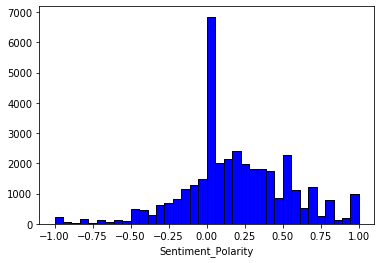

In [59]:
#######################################
## Data Preprocessing - Reviews Data ##
#######################################

# reviews turning to lower case and removing trailing spaces
google_rev['Translated_Review'] = google_rev['Translated_Review'].str.lower()
google_rev['Translated_Review'] = google_rev['Translated_Review'].str.strip()

# count distribution
google_rev['Sentiment'].value_counts()
## 64% of non-na sentiment - Positive
## 22.1% Negative
## 13.8% Neutral

# Removing observations with all NA values 
google_rev.isna().sum()
google_rev = google_rev.dropna()
google_rev.isna().sum()

# Checking for duplicate rows in the raw data
google_rev.duplicated().sum()


# Density Plot for Sentiment Polarity

# matplotlib histogram
plt.hist(google_rev['Sentiment_Polarity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(google_rev['Sentiment_Polarity'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}) ;

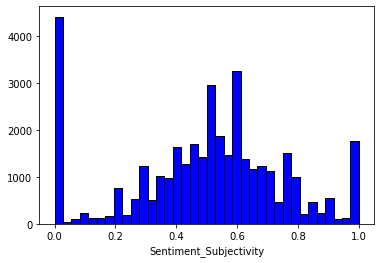

In [27]:
# Density Plot for Sentiment Subjectivity
# matplotlib histogram
plt.hist(google_rev['Sentiment_Subjectivity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(google_rev['Sentiment_Subjectivity'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}) ;



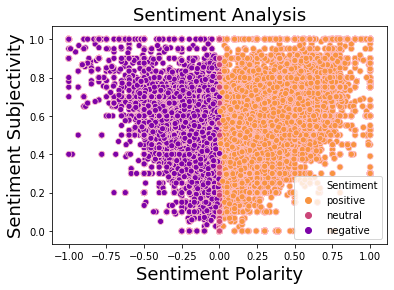

In [47]:
# Scatter PLot of Subjectivity and Polarity
j = sns.scatterplot(google_rev['Sentiment_Polarity'],google_rev['Sentiment_Subjectivity'],hue=google_rev['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=18)
plt.ylabel('Sentiment Subjectivity', fontsize=18)
plt.title("Sentiment Analysis", fontsize=18)
plt.show()

In [37]:
# Processing variables 'App' and 'Sentiment'
google_rev.dtypes
google_rev['App'] = google_rev['App'].str.lower()
google_rev['App'] = google_rev['App'].str.strip()
google_rev['Sentiment'] = google_rev['Sentiment'].str.lower()
google_rev['Sentiment'] = google_rev['Sentiment'].str.strip()
google_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 best foods for you,i like eat delicious food. that's i'm cooking ...,positive,1.00,0.533333
1,10 best foods for you,this help eating healthy exercise regular basis,positive,0.25,0.288462
3,10 best foods for you,works great especially going grocery store,positive,0.40,0.875000
4,10 best foods for you,best idea us,positive,1.00,0.300000
5,10 best foods for you,best way,positive,1.00,0.300000


In [212]:
#######################################
####   Data Cleaning - Apps Data   ####
#######################################

google_app.head()
## Converting App Size into Numeric variable using lambda function
# All v#alues in Megabytes

google_app['Size'] = google_app['Size'].apply(lambda x : x.strip('+').replace(',', ''))

ind_1 = google_app['Size'].loc[google_app['Size'].str.contains('k')].index.tolist()
size_new_k = pd.DataFrame(google_app.loc[ind_1, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1000).apply(lambda x: round(x, 3)).astype(str))
google_app.loc[ind_1,'Size'] = size_new_k

google_app['Size'] = google_app['Size'].apply(lambda x : x.strip('M'))

google_app[google_app['Size'] == 'Varies with device']= 0

google_app['Size'] = google_app['Size'].astype(float)

In [213]:
## Converting 'Installs' to numeric variable by taking minimum value of number of installs
google_app[google_app['Installs']=='Free']=0
google_app['Installs'] = google_app['Installs'].astype(str).apply(lambda x: x.strip('+').replace(',',''))


In [214]:
## Price Variable
set(google_app['Price']) ## There are '$' before price columns
google_app['Price'] = google_app['Price'].astype(str).apply(lambda x: x.strip('$')).astype(float)



In [215]:
## Type Variable -- converting 0 to category 'Free'
set(google_app['Type'])
google_app[google_app['Type']==0] = 'Free'
set(google_app['Type'])


{'Free', 'Paid'}

In [216]:
#google_app['Reviews'] = google_app['Reviews'].astype(str)
#ind_2 = google_app['Reviews'].loc[google_app['Reviews'].str.contains('M')]
#rev_n = pd.DataFrame(google_app.loc[ind_2, 'Reviews'].apply(lambda x: x.strip('M')).astype(float).apply(lambda x: x * 1000000).apply(lambda x: round(x, 0)).astype(str))
google_app[google_app['Reviews']=='Free'] = 0
google_app['Reviews'] = google_app['Reviews'].astype(float)

In [217]:
google_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
